In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('world_population.csv', sep=',')

In [15]:
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [19]:
df.head(5)

,rank,cca3,country,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [17]:
df['continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: continent, dtype: int64

__Посмотрим какое количество стран на континентах__ 

Text(93.25, 0.5, 'Count of Countries')

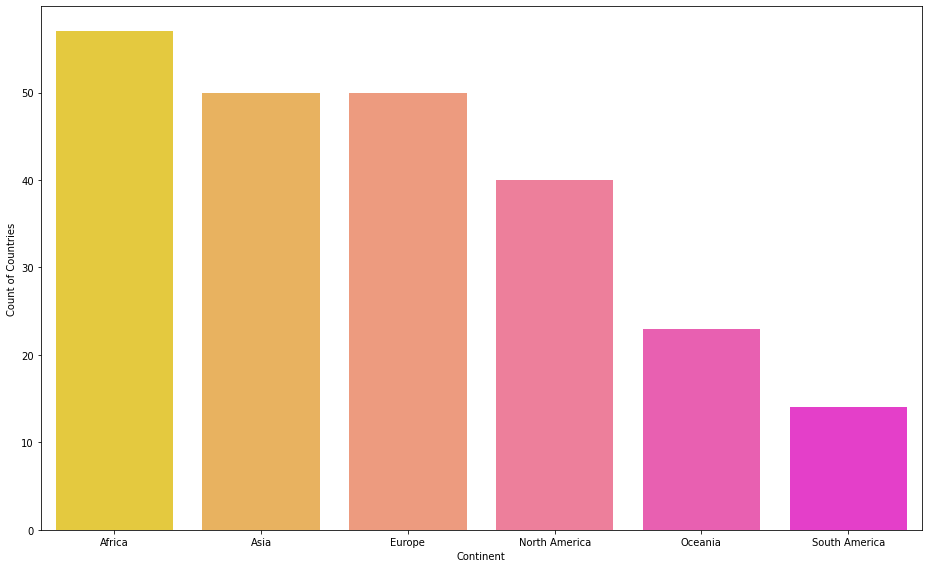

In [86]:
plt.figure(figsize= (13,8))
sns.countplot(x = 'continent', data = df.sort_values(by = 'continent', ascending = True), palette= 'spring_r')
plt.tight_layout()
plt.xlabel('Continent')
plt.ylabel('Count of Countries')

- По численности стран лидирует __Африка__, где таковых насчитывается 57.
- Меньше всего стран расположилось в __Южной Америке__ - лишь 14. 
- Ну а всего на Земле __234 страны__, но по разным подсчетам (с разными критериями) это число может варьироваться.

In [32]:
cont_percentage = df.groupby('continent')['world_population_percentage'].sum().round(1).sort_values(ascending= False).reset_index()
cont_percentage

,continent,world_population_percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


__Доля населения на континентах в процентах от суммарного населения Земли__

Text(0.5, 1.0, 'continent - population%')

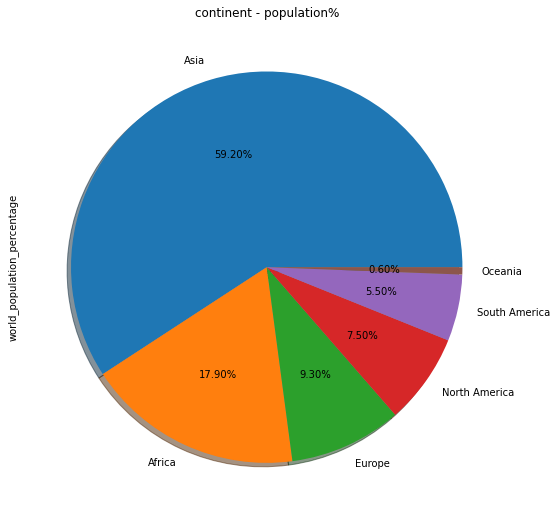

In [36]:
cont_percentage['world_population_percentage'].plot.pie(labels= cont_percentage['continent'], autopct = '%1.2f%%', figsize= (16,9),shadow = True)
plt.title('continent - population%')

- Наибольшим континентом является __Азия__. Количество населения - __59,20__ %. 
- Самым маленьким из графика является __Австралия (Океания) - 0,60 %__. 
- В графике и представленной таблице отсутствует Антарктида, потому что этот окованный льдом континент непригоден для жизни (комфортной) и по большому счету необитаем.

In [46]:
popl_2000_to_2020 = df.groupby('continent')[['2000_population','2020_population']].sum().sort_values(by = 'continent', ascending= True).reset_index()
popl_2000_to_2020 

,continent,2000_population,2020_population
0,Africa,818946032,1360671810
1,Asia,3735089604,4663086535
2,Europe,726093423,745792196
3,North America,486069584,594236593
4,Oceania,31222778,43933426
5,South America,349634282,431530043


In [48]:
popl_2000_to_2020['percentage'] = round(popl_2000_to_2020['2000_population']/ popl_2000_to_2020['2020_population']*100,2)
popl_2000_to_2020

,continent,2000_population,2020_population,percentage
0,Africa,818946032,1360671810,60.19
1,Asia,3735089604,4663086535,80.10
2,Europe,726093423,745792196,97.36
3,North America,486069584,594236593,81.80
4,Oceania,31222778,43933426,71.07
5,South America,349634282,431530043,81.02


__Динамика численности населения Земли с 2000 года по 2022 год__

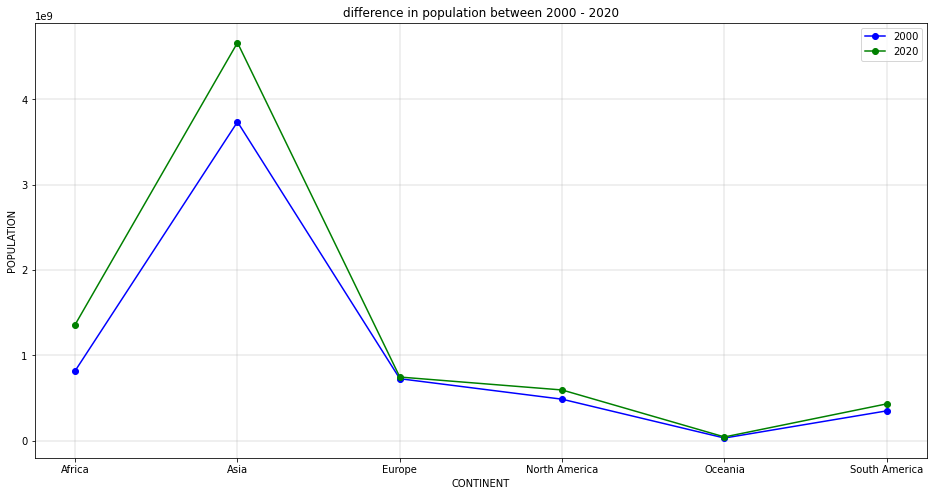

In [50]:
plt.figure(figsize = (16,8))
plt.plot(popl_2000_to_2020['continent'],popl_2000_to_2020['2000_population'], label = '2000', color = 'blue', marker = 'o' )
plt.plot(popl_2000_to_2020['continent'],popl_2000_to_2020['2020_population'], label = '2020', color = 'green', marker = 'o')
plt.title('difference in population between 2000 - 2020')
plt.xlabel('CONTINENT')
plt.ylabel('POPULATION')
plt.grid(linewidth = 0.4)
plt.legend()
plt.show()

- Общая численность населения планеты постоянно увеличивается, хотя в разных странах её динамика существенно различается:
- Как мы видим из графика, за 20 лет существенно увеличилась численность наслеления в странах Азии и Африки.
- Совсем незначительно изменился показатель в Северной и Южной Америке.

In [51]:
popl_2020_to_2022 = df.groupby('continent')[['2020_population','2022_population']].sum().sort_values(by = 'continent', ascending= True).reset_index()
popl_2020_to_2022 

,continent,2020_population,2022_population
0,Africa,1360671810,1426730932
1,Asia,4663086535,4721383274
2,Europe,745792196,743147538
3,North America,594236593,600296136
4,Oceania,43933426,45038554
5,South America,431530043,436816608


In [52]:
popl_2020_to_2022['percentage'] = round(popl_2020_to_2022['2020_population']/ popl_2020_to_2022['2022_population']*100,2)
popl_2020_to_2022

,continent,2020_population,2022_population,percentage
0,Africa,1360671810,1426730932,95.37
1,Asia,4663086535,4721383274,98.77
2,Europe,745792196,743147538,100.36
3,North America,594236593,600296136,98.99
4,Oceania,43933426,45038554,97.55
5,South America,431530043,436816608,98.79


__Динамика численности населения Земли с 2020 года по 2022 год__

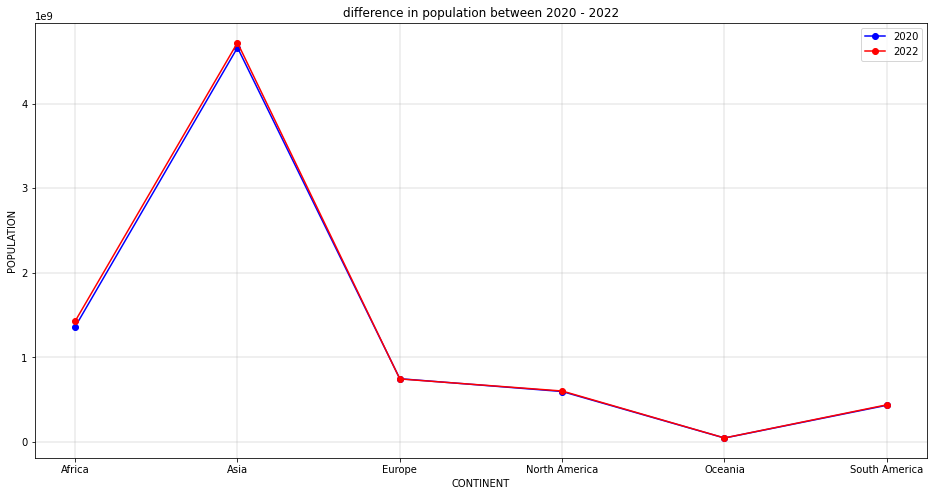

In [84]:
plt.figure(figsize = (16,8))
plt.plot(popl_2020_to_2022['continent'],popl_2020_to_2022['2020_population'], label = '2020', color = 'blue', marker = 'o' )
plt.plot(popl_2020_to_2022['continent'],popl_2020_to_2022['2022_population'], label = '2022', color = 'red', marker = 'o')
plt.title('difference in population between 2020 - 2022')
plt.xlabel('CONTINENT')
plt.ylabel('POPULATION')
plt.grid(linewidth = 0.4)
plt.legend()
plt.show()

- За 2 года мы не видим практически никаких серьезных изменений в численности населения Мира, т.к. свои колоссальные корректировки в этом промежутке времени внесла всемирная __пандемия COVID-19.__

In [70]:
highest_population = df[['country','2022_population']].sort_values(by = '2022_population', ascending = False).head(10).reset_index()
highest_population

,index,country,2022_population
0,41,China,1425887337
1,92,India,1417173173
2,221,United States,338289857
3,93,Indonesia,275501339
4,156,Pakistan,235824862
5,149,Nigeria,218541212
6,27,Brazil,215313498
7,16,Bangladesh,171186372
8,171,Russia,144713314
9,131,Mexico,127504125


__ТОП-10 стран по численности населения на Земле в 2022 году__

Text(0.5, 1.0, 'country - population%')

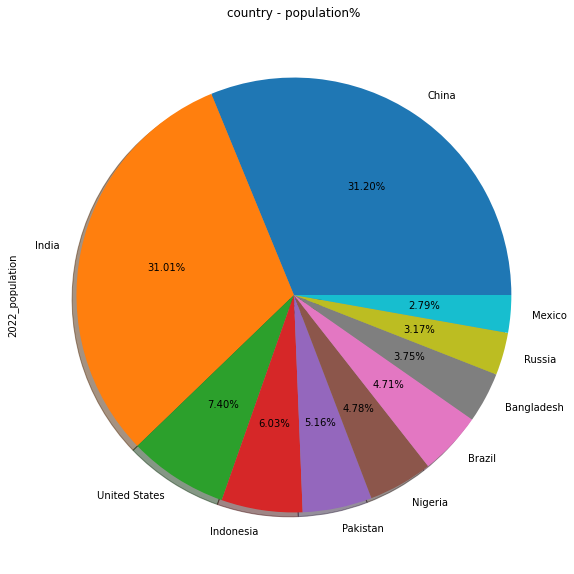

In [72]:
highest_population['2022_population'].plot.pie(labels= highest_population['country'], autopct = '%1.2f%%', figsize= (18,10),shadow = True)
plt.title('country - population%')

Text(0.5, 1.0, 'TOP 10 COUNTRY WITH HIGHEST POPULATION')

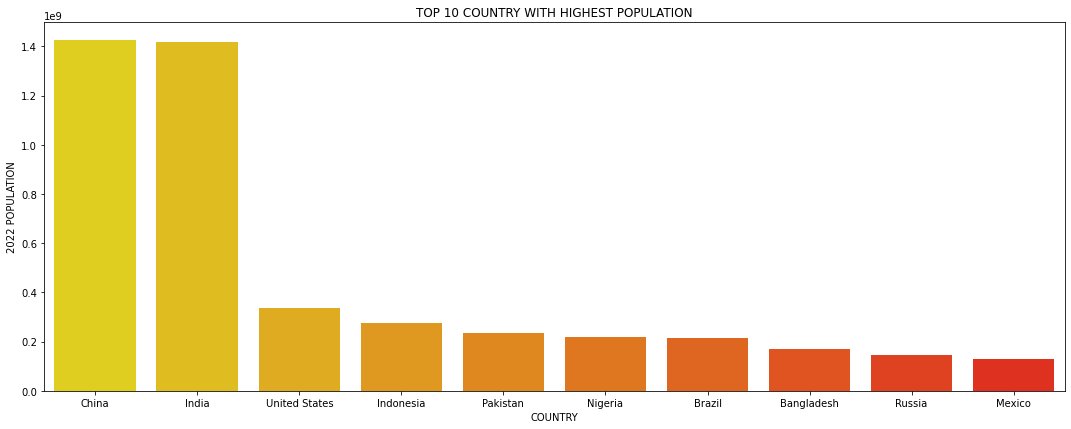

In [83]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'country', y = '2022_population', data = highest_population , palette = 'autumn_r')
plt.tight_layout()
plt.xlabel('COUNTRY')
plt.ylabel('2022 POPULATION')
plt.title('TOP 10 COUNTRY WITH HIGHEST POPULATION')

- Треть всего человечества проживает в __Китае (31,20 %) и Индии (31,01 %)__. 
- Из европейских стран Россия заняла девятое место в списке с показателем 3,17%.

In [75]:
growth_rate = df.groupby('continent')['growth_rate'].sum().reset_index()
total_growth_rate = df['growth_rate'].sum()
growth_rate['per_growth_rate'] = round(growth_rate['growth_rate']/total_growth_rate*100,2)
growth_rate

,continent,growth_rate,per_growth_rate
0,Africa,58.2109,24.64
1,Asia,50.4692,21.36
2,Europe,50.1128,21.21
3,North America,40.1670,17.00
4,Oceania,23.1698,9.81
5,South America,14.1114,5.97


__Среднегодовой темп роста населения планеты__

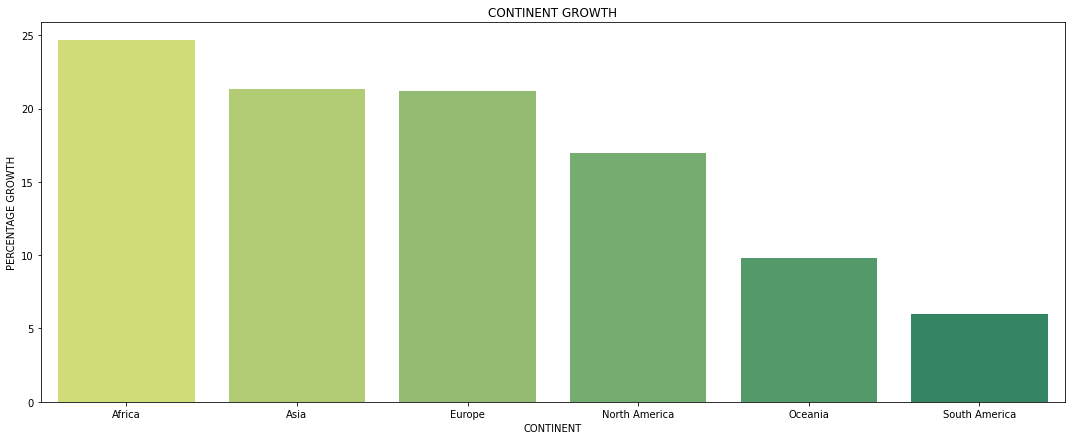

In [77]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'continent', y = 'per_growth_rate', data = growth_rate, palette = 'summer_r')
plt.tight_layout()
plt.title('CONTINENT GROWTH')
plt.xlabel('CONTINENT')
plt.ylabel('PERCENTAGE GROWTH')
plt.show()

- Самый высокий уровень роста населения в __Африке - 24,64 %.__ Несмотря на такой высокий показатель, большая часть жителей в этих странах живёт за чертой бедности. 
Связано это с тем, что темпы роста населения опережают развитие экономики.


- Значительный рост численности наблюдается в странах __Азии и Европы__, показатели практически не отличаются друг от друга (__21,36% и 21,21%__ соответственно). Это наиболее развитые страны, следовательно, с каждым годом наблюдается рост экономики, улучшается благосостояние жителей и условия жизни.

- Темпы роста жителей на планете Земля зависят от социально-экономических и политических факторов, состояния медицинской системы и сферы здравоохранения. Всё это будет в будущем определять и уровень рождаемости в регионах мира.

__Основные тенденции:__

- Во всем мире уровень рождаемости и смертности будет приблизительно таким, какой есть сейчас.


- Малоразвитые страны будут давать главный прирост населения в мире. 


- В развитых государствах численность жителей практически не поменяется.

- Тенденция по неравномерному распределению людей на планете будет и дальше сохраняться. 
- Самым многолюдным регионом будет Азия.

- В Северной и Латинской Америке, в Океании и Европе на сегодняшний день проживает почти 1,7 млрд. человек. По прогнозам ООН, численность жителей вырастет к 2054 году не значительно – на 300 млн. чел., достигнув отметки 2 млрд. чел.



- Потом численность меняться в данных регионах мира не будет. Связано это с тем, что в Европе население выросло до своих максимальных показателей.

- В Латинской Америке, самых высших показателей количество жителей достигнет в начале 2060-х годов (больше 790 млн. чел.). В Океании и Северной Америке население будет расти медленно в течение следующих десятилетий.